In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Fully Connected Neural Network with 3 hidden layers 

In [19]:
# Load SVHNDigit data

from SVHNDigit.generic import read_dataset

data_dir = '../data'
train_filename = 'train_32x32.mat'
test_filename = 'test_32x32.mat'

train_X, train_y, val_X, val_y, test_X, test_y = \
    read_dataset(data_dir, train_filename, test_filename, val_size=20132, reshape=True)

Training data shape:  (53125, 3072) (53125, 10)
Validation data shape:  (20132, 3072) (20132, 10)
Test data shape:  (26032, 3072) (26032, 10)


In [21]:
# Train a Fully Connected NN with 3 hidden layers of sizes 64, 128 and 256

from SVHNDigit.models.fcnn_relu_64_128_256_10_softmax.model import FCNN
from SVHNDigit.generic import train_model

input_dim = train_X.shape[1]

lr = 1.865e-3
reg_factor = 2e-6
dropout_param = 0.0
momentum = 0.0

model_define_params = {'reg_factor': reg_factor, 
                       'init': 'glorot_normal',
                       'use_dropout': False,
                       'dropout_param': dropout_param, 
                       'use_batchnorm': True}    

fcnn_model = FCNN(model_define_params, input_dim)
fcnn_model = fcnn_model.define(verbose=0)

model_train_params = {'loss': 'categorical_crossentropy', 
                      'optimizer': 'adam', 
                      'lr': lr,
                      'momentum': momentum,
                      'nesterov': False,
                      'metrics': ['accuracy'], 
                      'batch_size': 128, 
                      'nb_epochs': 20}

train_model(fcnn_model, model_train_params, train_X, train_y, 
            val_X, val_y, verbose=1, tb_logs=True)

Epoch 1/20
53125/53125 [==============================] - 25s - loss: 1.3077 - acc: 0.5717    
Epoch 2/20
53125/53125 [==============================] - 23s - loss: 0.9213 - acc: 0.7090    
Epoch 3/20
53125/53125 [==============================] - 23s - loss: 0.7958 - acc: 0.7486    
Epoch 4/20
53125/53125 [==============================] - 24s - loss: 0.7266 - acc: 0.7713    
Epoch 5/20
53125/53125 [==============================] - 23s - loss: 0.7255 - acc: 0.7726    
Epoch 6/20
53125/53125 [==============================] - 23s - loss: 0.6541 - acc: 0.7961    
Epoch 7/20
53125/53125 [==============================] - 26s - loss: 0.6516 - acc: 0.7948    
Epoch 8/20
53125/53125 [==============================] - 27s - loss: 0.6061 - acc: 0.8109    
Epoch 9/20
53125/53125 [==============================] - 23s - loss: 0.5605 - acc: 0.8261    
Epoch 10/20
53125/53125 [==============================] - 24s - loss: 0.5359 - acc: 0.8335    
Epoch 11/20
53125/53125 [========================

In [14]:
from keras.utils import np_utils


pred_y = fcnn_model.predict_classes(test_X, batch_size=128, verbose=1)
print "Test Accuracy: %0.2f" % (np_utils.accuracy(pred_y, np.argmax(test_y, axis=1)))

26032/26032 [==============================] - 4s     
Test Accuracy: 0.71


### Convolutional Neural Network - [conv-relu-pool] x 2 - [conv-relu] x 1 - [affine-relu] x 2 - [affine-softmax]

In [2]:
# Load SVHNDigit data

from SVHNDigit.generic import read_dataset

data_dir = '../data'
train_filename = 'train_32x32.mat'
test_filename = 'test_32x32.mat'

train_X, train_y, val_X, val_y, test_X, test_y = \
    read_dataset(data_dir, train_filename, test_filename, val_size=20132, reshape=False)

Training data shape:  (53125, 3, 32, 32) (53125, 10)
Validation data shape:  (20132, 3, 32, 32) (20132, 10)
Test data shape:  (26032, 3, 32, 32) (26032, 10)


Using TensorFlow backend.


In [11]:
from SVHNDigit.models.fcnn_relu_64_128_256_10_softmax.model import FCNN
from SVHNDigit.models.cnn.model import CNN_1, LeNet5Mod
from SVHNDigit.generic import train_model

input_dim = train_X.shape[1:]

#num_samples = 9600
#train_X_small = train_X[0:num_samples, :, :, :]
#train_y_small = train_y[0:num_samples]

lr = 1e-2 
lr_decay = 1e-3
reg_factor = 2e-6
dropout_param = 0.05
momentum = 0.9

model_define_params = {'reg_factor': reg_factor, 
                       'init': 'glorot_normal',
                       'use_dropout': True,
                       'dropout_param': dropout_param, 
                       'use_batchnorm': True}    

#cnn = CNN_1(model_define_params, input_dim)
cnn = LeNet5Mod(model_define_params, input_dim)
cnn.define(verbose=1)


model_train_params = {'loss': 'categorical_crossentropy', 
                      'optimizer': 'sgd', 
                      'lr': lr,
                      'momentum': momentum,
                      'decay': lr_decay,
                      'nesterov': True,
                      'metrics': ['accuracy'], 
                      'batch_size': 128, 
                      'nb_epochs': 3}

train_model(cnn, model_train_params, train_X, train_y, 
            val_X, val_y, verbose=1)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_29 (Convolution2D) (None, 6, 32, 32)     456         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
batchnormalization_45 (BatchNorma(None, 6, 32, 32)     12          convolution2d_29[0][0]           
____________________________________________________________________________________________________
activation_53 (Activation)       (None, 6, 32, 32)     0           batchnormalization_45[0][0]      
____________________________________________________________________________________________________
maxpooling2d_25 (MaxPooling2D)   (None, 6, 16, 16)     0           activation_53[0][0]              
___________________________________________________________________________________________

In [6]:
# Hyperparameter tuning

from SVHNDigit.models.cnn.model import CNN_1
from SVHNDigit.generic import build_tune_model


num_samples = 9600
train_X_small = train_X[0:num_samples, :, :, :]
train_y_small = train_y[0:num_samples]

lr = 0.2
lr_decay = 0.01
reg_factor = 2e-6
dropout_param = 0.05
momentum = 0.9


model_define_params = {'reg_factor': reg_factor, 
                       'init': 'glorot_normal',
                       'use_dropout': True,
                       'dropout_param': dropout_param, 
                       'use_batchnorm': True
                      }    

model_train_params = {'loss': 'categorical_crossentropy', 
                      'optimizer': 'sgd', 
                      'lr': lr,
                      'momentum': momentum,
                      'decay': lr_decay,
                      'nesterov': True,
                      'metrics': ['accuracy'], 
                      'batch_size': 32, 
                      'nb_epochs': 2
                     }

model_tune_params = {'lr': [-2.3, -1.3], # [5e-3, 5e-2]
                     'reg_factor': [-6, -5], # [1e-6, 1e-5]
                     'dropout_param': [-2, -0.7], # [0.01, 0.2]
                     'momentum': [-1, -0.3] # [0.1, 0.5]
                    }

num_iters = 3

best_params = build_tune_model(model_tune_params,
                               model_train_params,
                               model_define_params,
                               train_X, train_y,
                               val_X, val_y,
                               num_iters,
                               verbose=1)


Train on 47812 samples, validate on 5313 samples
Epoch 1/2
 1248/47812 [..............................] - ETA: 1469s - loss: 2.4277 - acc: 0.1498

KeyboardInterrupt: 

In [12]:
from keras.utils import np_utils


pred_y = cnn.model.predict_classes(test_X, batch_size=512, verbose=1)
print "Test Accuracy: %0.2f" % (np_utils.accuracy(pred_y, np.argmax(test_y, axis=1)))

26032/26032 [==============================] - 131s   
Test Accuracy: 0.88


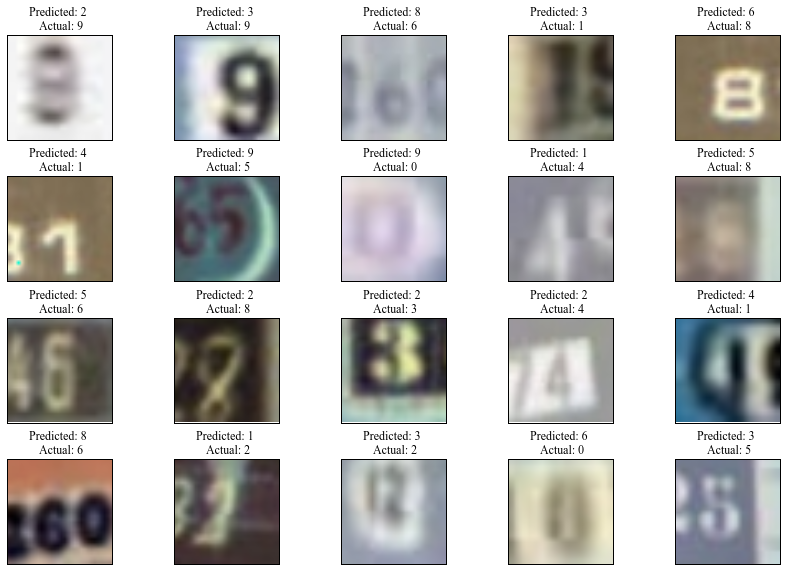

In [13]:
test_X_miss = test_X[np.not_equal(pred_y, np.argmax(test_y, axis=1))]
pred_y_miss = pred_y[np.not_equal(pred_y, np.argmax(test_y, axis=1))]
test_y_miss = np.argmax(test_y, axis=1)[np.not_equal(pred_y, np.argmax(test_y, axis=1))]


fig = plt.figure(figsize=[12, 8])

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(((test_X_miss[i].T)*255.0).astype(int))
    plt.title('Predicted: %d \n Actual: %d' % (pred_y_miss[i], test_y_miss[i]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

